
Running on gun.bmp with 2x2 SE


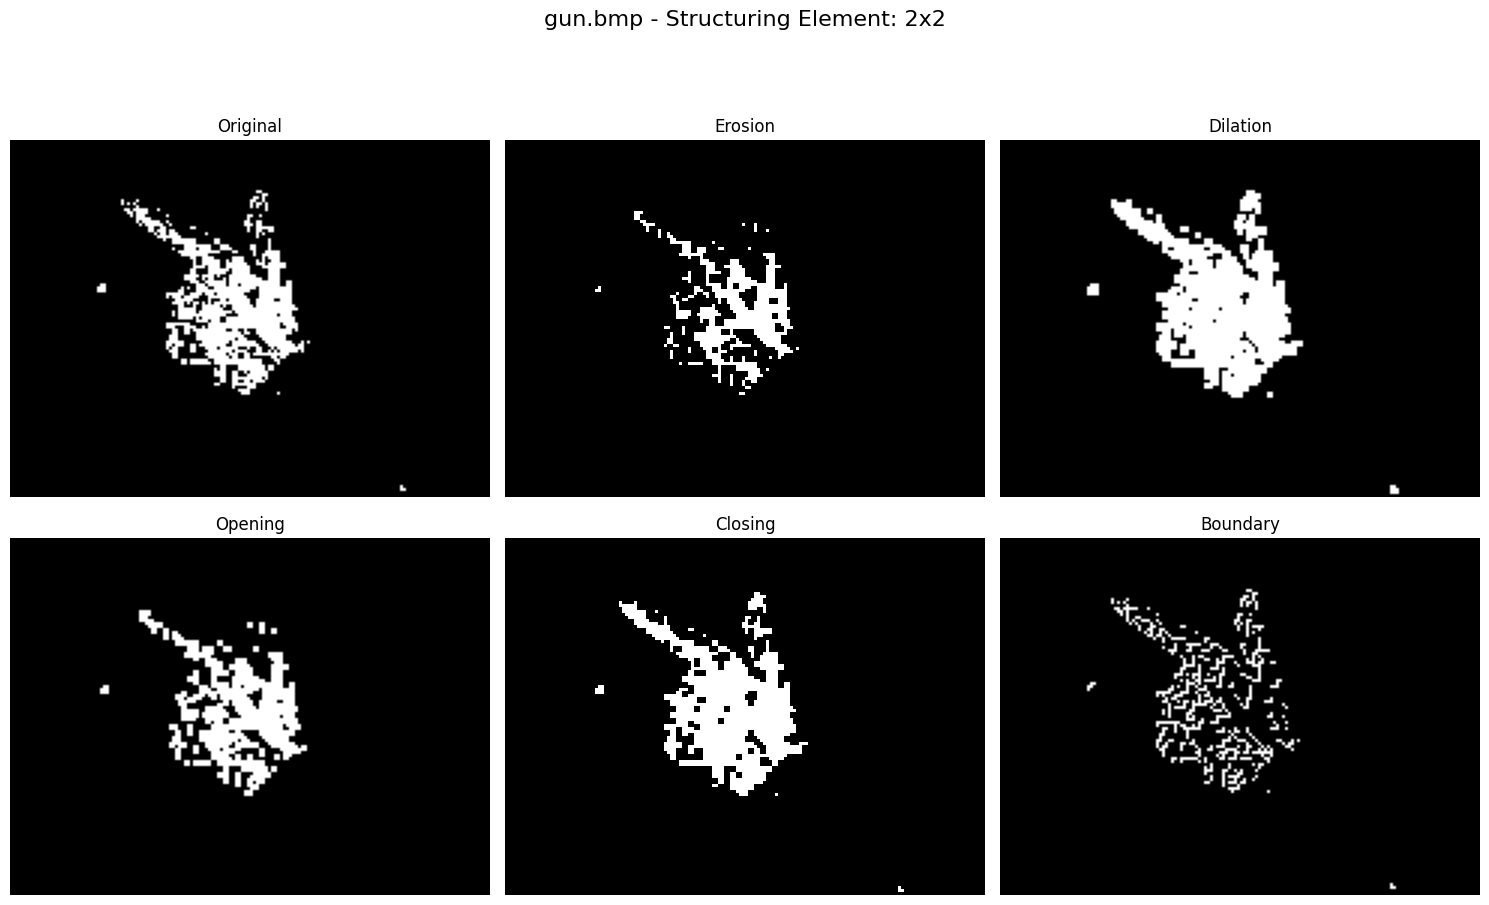


Running on gun.bmp with 3x3 SE


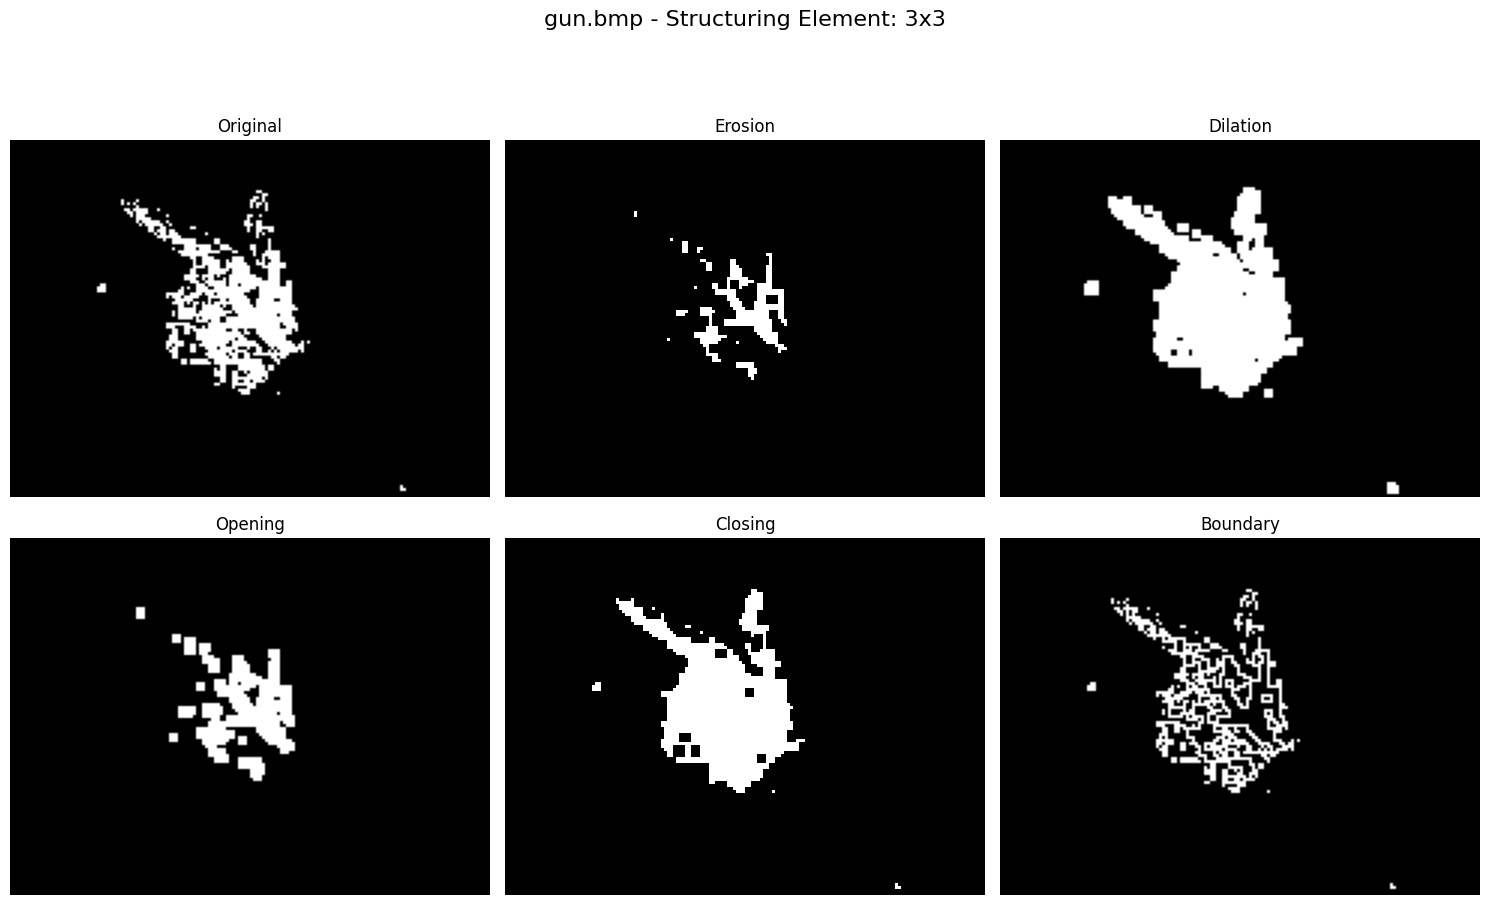


Running on gun.bmp with Cross SE


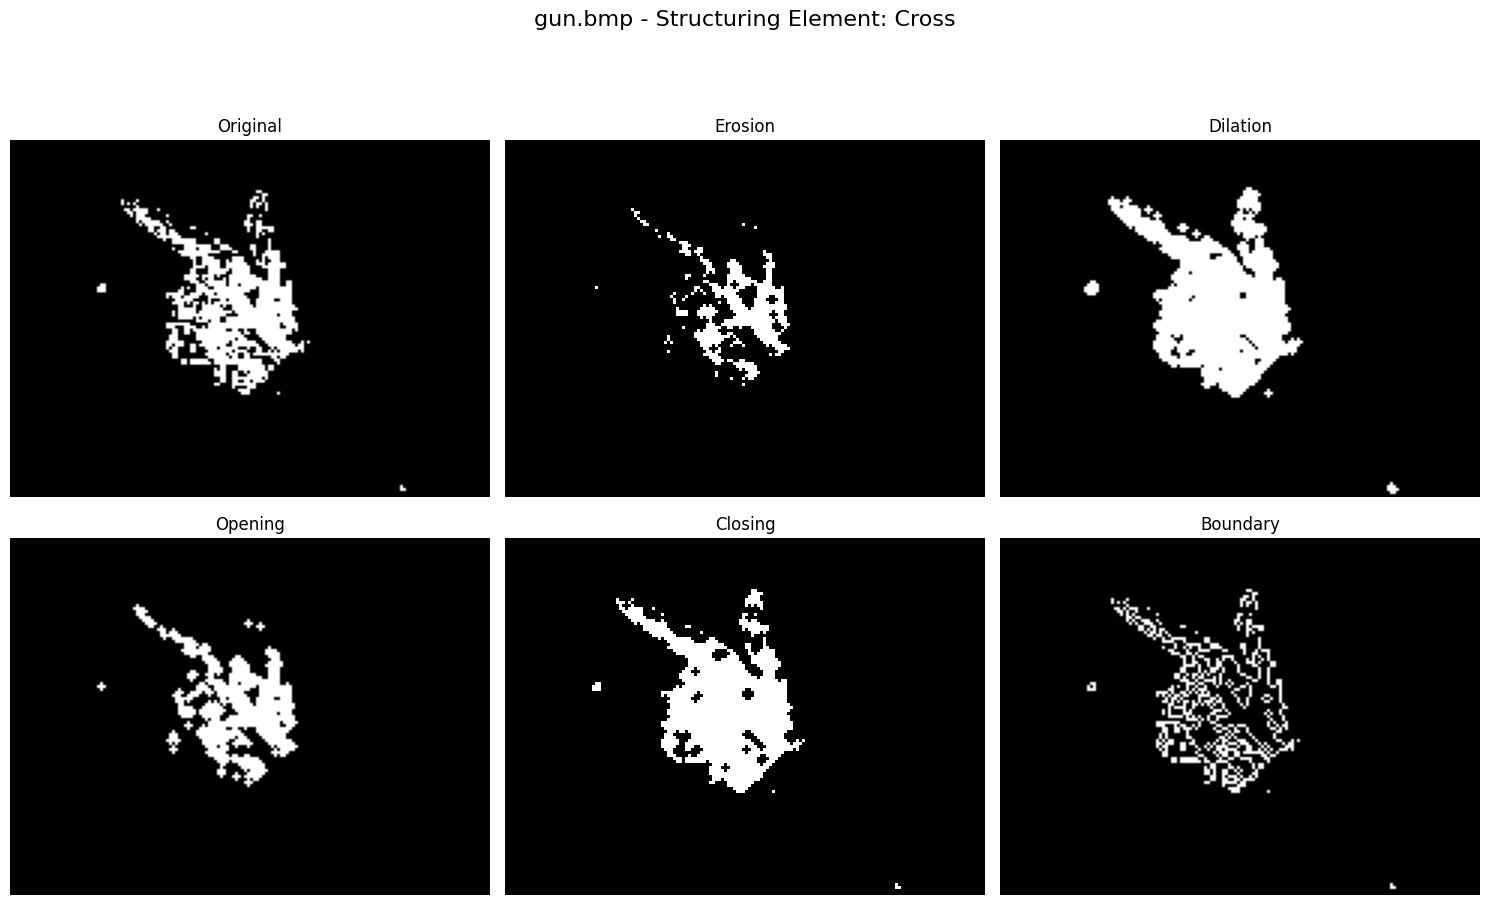


Running on gun.bmp with Circle SE


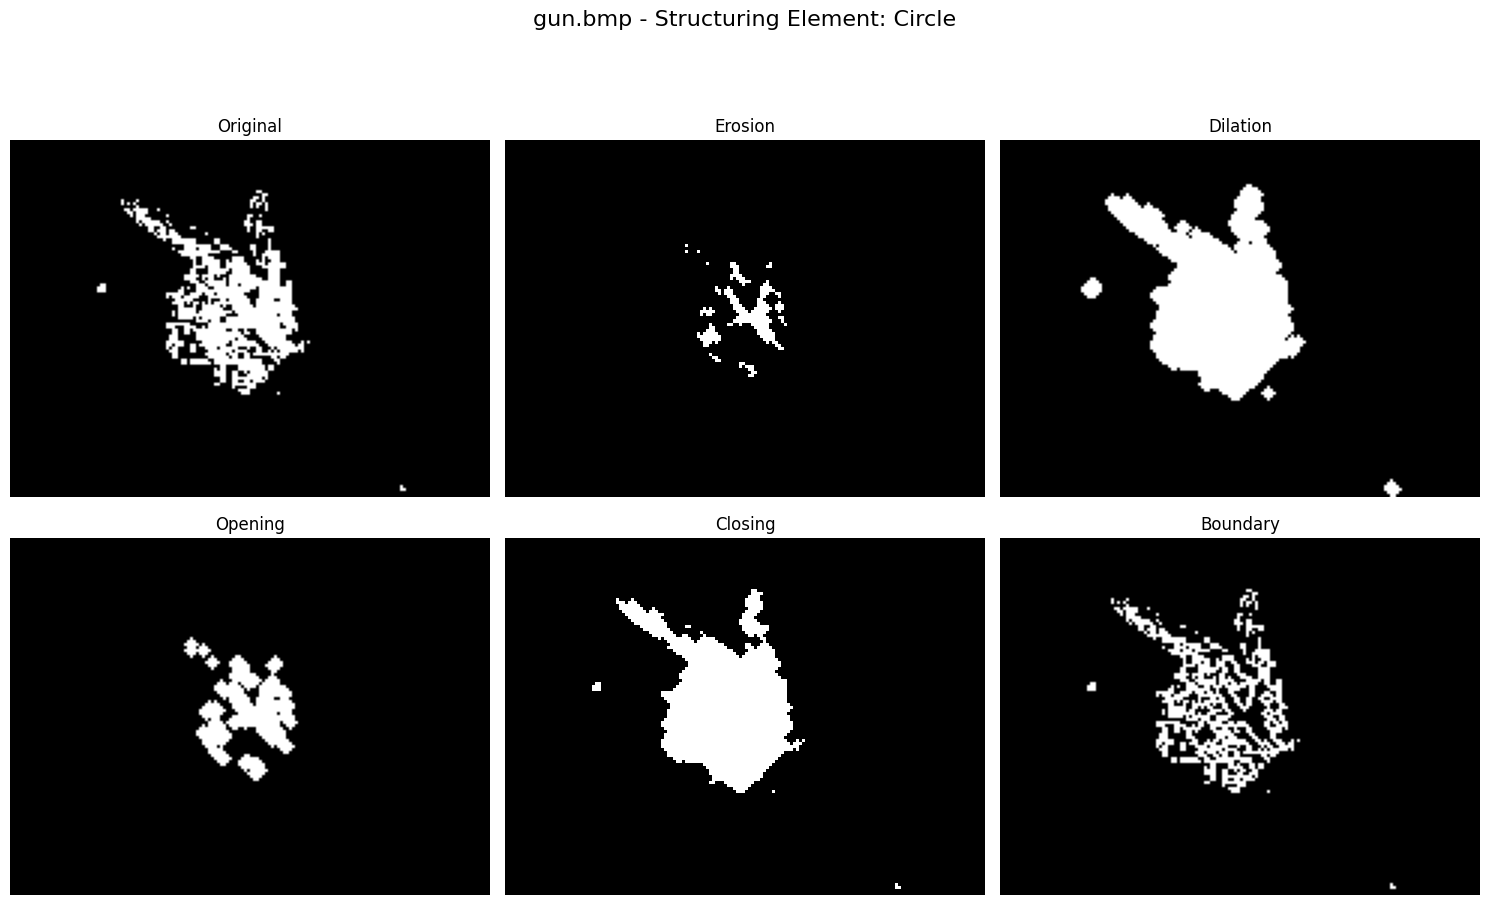


Running on palm.bmp with 2x2 SE


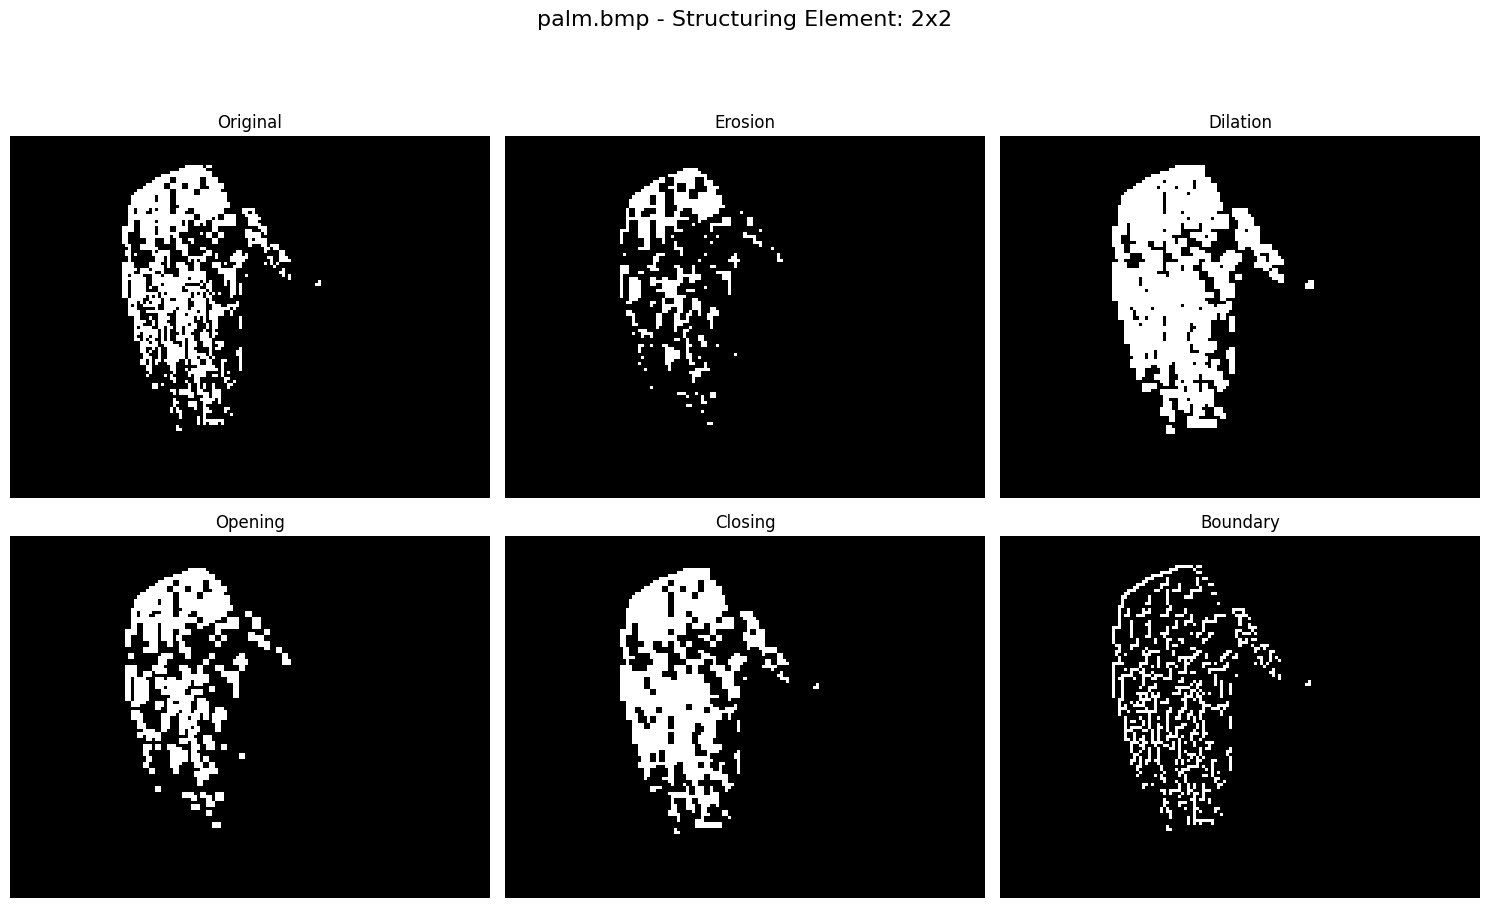


Running on palm.bmp with 3x3 SE


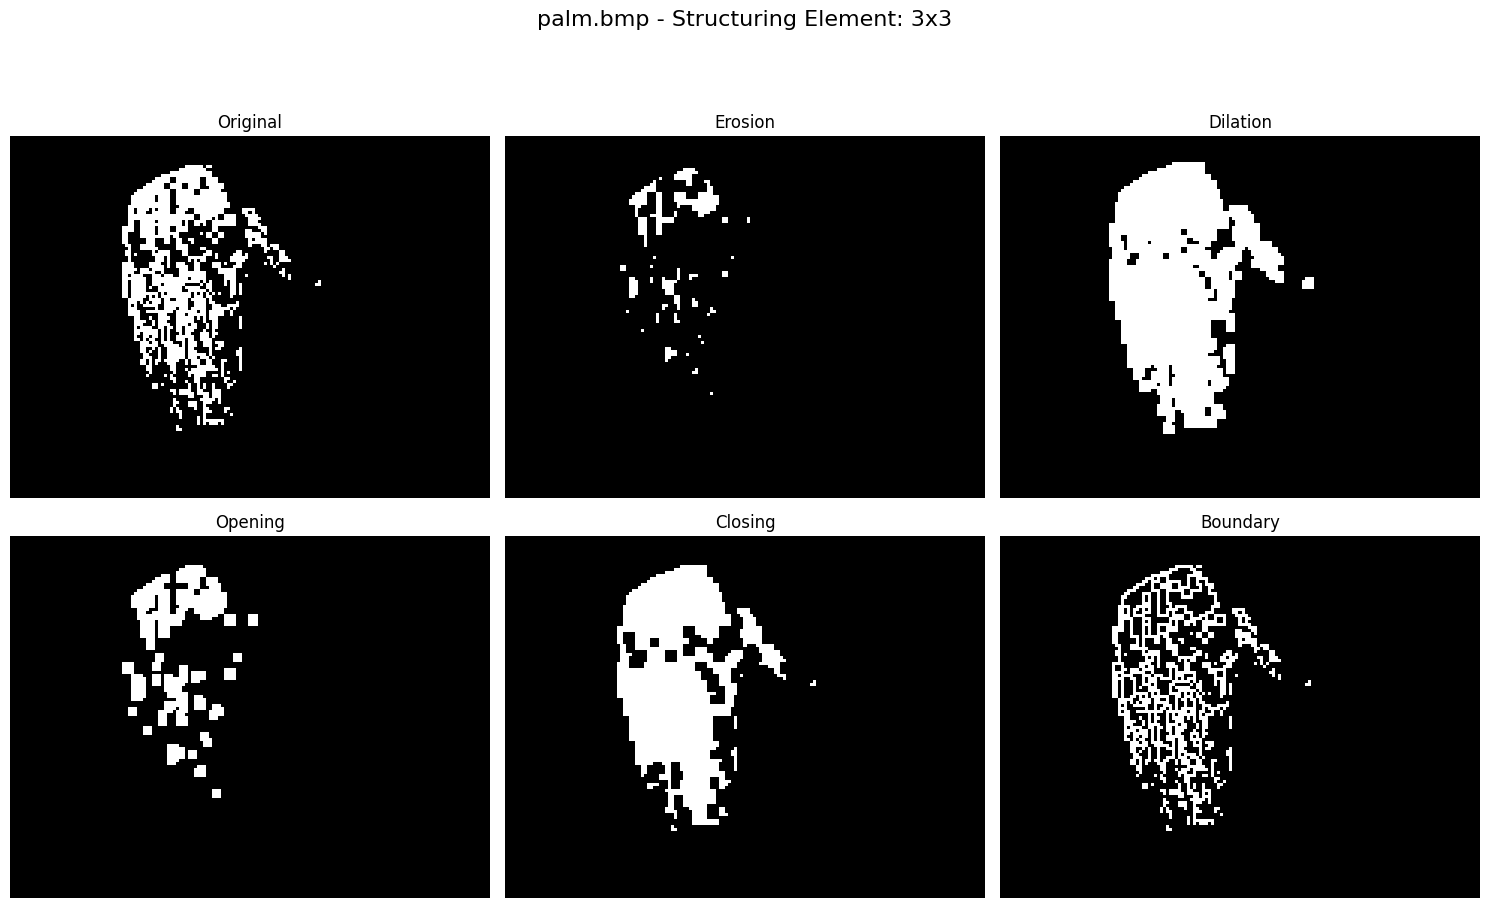


Running on palm.bmp with Cross SE


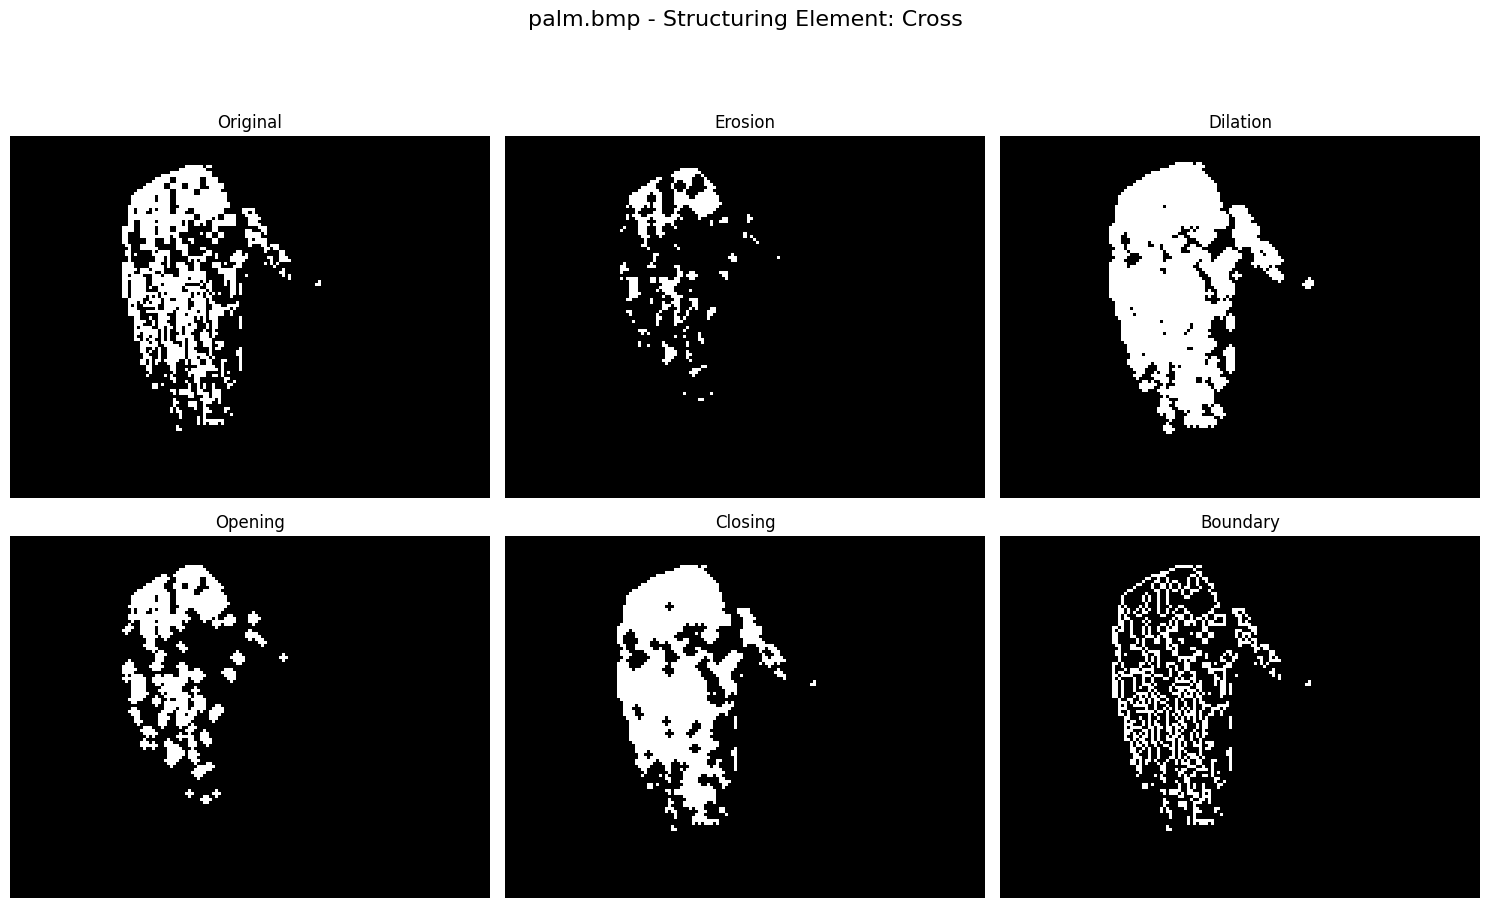


Running on palm.bmp with Circle SE


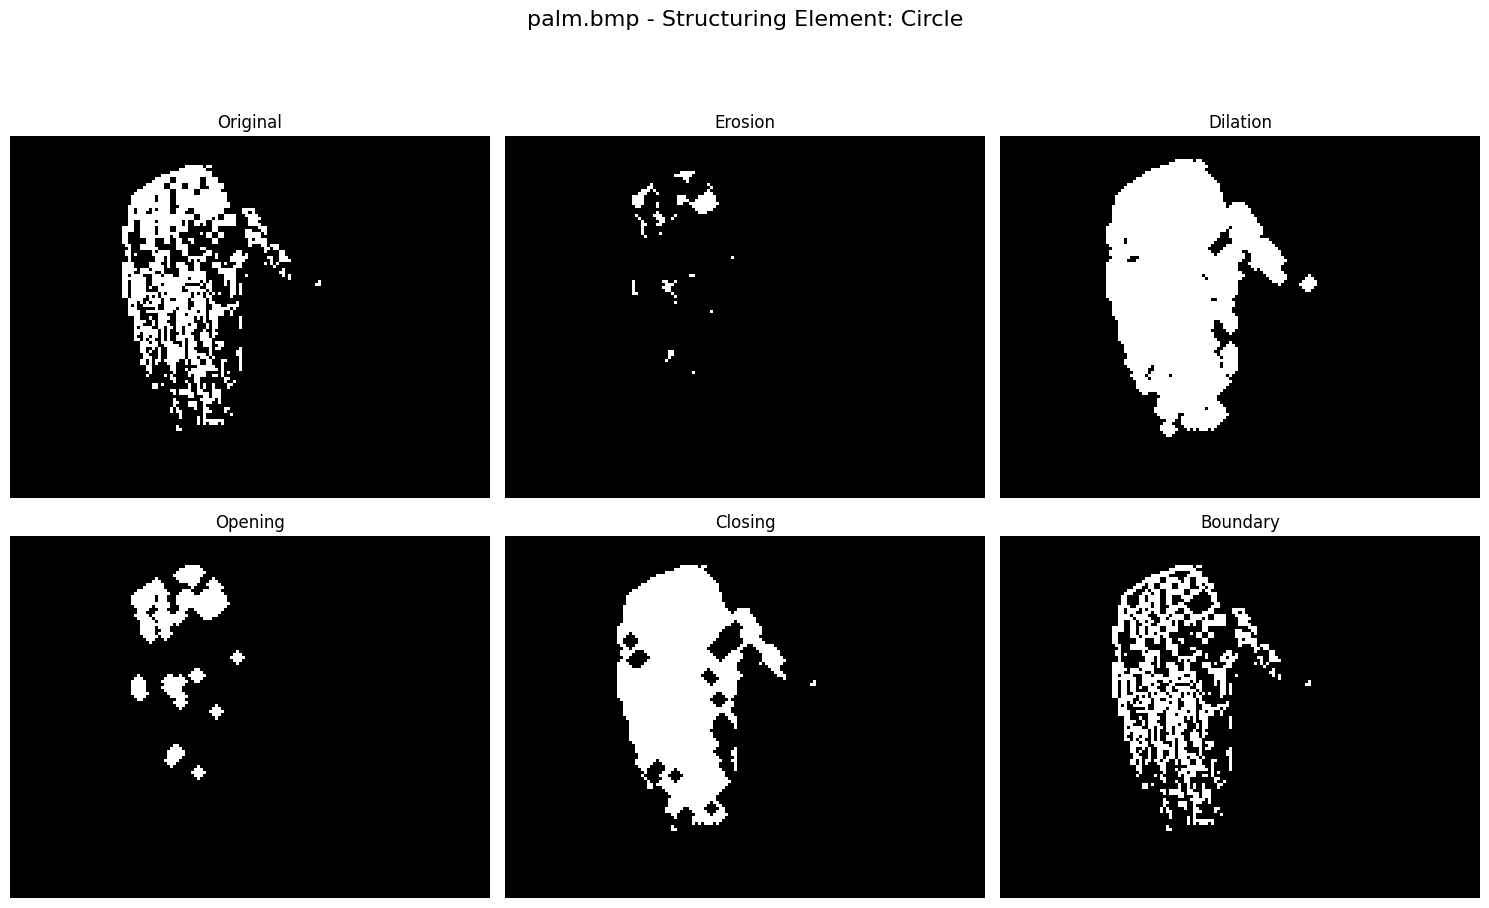

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Different Structuring Elements
SEs = {
    "2x2": np.ones((2, 2), dtype=np.uint8),
    "3x3": np.ones((3, 3), dtype=np.uint8),
    "Cross": np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8),
    "Circle": np.array([[0, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)
}


def pad_image(img, se_shape):
    pad_height = se_shape[0] // 2
    pad_width = se_shape[1] // 2
    return np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

def erosion(img_in, SE):
    rows, cols = img_in.shape
    se_rows, se_cols = SE.shape
    padded = pad_image(img_in, SE.shape)
    img_out = np.zeros_like(img_in)

    for r in range(rows):
        for c in range(cols):
            roi = padded[r:r+se_rows, c:c+se_cols]
            if np.array_equal(roi & SE, SE):
                img_out[r, c] = 1
    return img_out

def dilation(img_in, SE):
    rows, cols = img_in.shape
    se_rows, se_cols = SE.shape
    padded = pad_image(img_in, SE.shape)
    img_out = np.zeros_like(img_in)

    for r in range(rows):
        for c in range(cols):
            roi = padded[r:r+se_rows, c:c+se_cols]
            if np.any(roi & SE):
                img_out[r, c] = 1
    return img_out

def opening(img_in, SE):
    return dilation(erosion(img_in, SE), SE)

def closing(img_in, SE):
    return erosion(dilation(img_in, SE), SE)

def boundary(img_in, SE):
    return img_in - erosion(img_in, SE)

images = ["gun.bmp", "palm.bmp"]

for img_name in images:
    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    binary = binary // 255

    for label, SE in SEs.items():
        print(f"\nRunning on {img_name} with {label} SE")
        eroded = erosion(binary, SE)
        dilated = dilation(binary, SE)
        opened = opening(binary, SE)
        closed = closing(binary, SE)
        bound = boundary(binary, SE)

        plt.figure(figsize=(15, 10))
        plt.suptitle(f"{img_name} - Structuring Element: {label}", fontsize=16)

        plt.subplot(2, 3, 1)
        plt.title("Original")
        plt.imshow(binary, cmap="gray")
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.title("Erosion")
        plt.imshow(eroded, cmap="gray")
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.title("Dilation")
        plt.imshow(dilated, cmap="gray")
        plt.axis('off')

        plt.subplot(2, 3, 4)
        plt.title("Opening")
        plt.imshow(opened, cmap="gray")
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.title("Closing")
        plt.imshow(closed, cmap="gray")
        plt.axis('off')

        plt.subplot(2, 3, 6)
        plt.title("Boundary")
        plt.imshow(bound, cmap="gray")
        plt.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
